# **Importing important libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score


# READING THE DATA

In [2]:
# loading the dataset to a Pandas DataFrame
data = pd.read_csv('/content/train_loan_data (1).csv')

In [3]:
data

addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0           Jul-97  10+ years   
1             CA     40000.0           Apr-87  10+ years   
2             FL     60000.0           Aug-07  10+ years   
3             IL    100742.0           Sep-80  10+ years   
4             MD     80000.0           Jul-99  10+ years   
...          ...         ...              ...        ...   
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   
79999         NY   1100000.0           Jun-99    2 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy              744             740     E   
1      Department of Veterans Affairs              724             720     B   
2                    Marble polishing              679             675     B   
3                             printer              664             660     B   
4                       Southern Mgmt              669             665     F   
...                               ...              ...             ...   ...   
79995            Sports Group Manager              664             660     G   
79996                    Web Designer              684             680     C   
79997                 Program Officer              724             720     B   
79998            Sr. Business Analyst              669             665     D   
79999               Managing Director              664             660     B   

      home_ownership application_type  ... pub_rec_bankruptcies  \
0           MORTGAGE       Individual  ...                  0.0   
1               RENT       Individual  ...                  0.0   
2           MORTGAGE       Individual  ...                  0.0   
3           MORTGAGE       Individual  ...                  0.0   
4               RENT       Individual  ...                  0.0   
...              ...              ...  ...                  ...   
79995       MORTGAGE       Individual  ...                  0.0   
79996       MORTGAGE       Individual  ...                  0.0   
79997            OWN       Individual  ...                  0.0   
79998       MORTGAGE       Individual  ...                  1.0   
79999       MORTGAGE       Individual  ...                  0.0   

                  purpose  revol_bal  revol_util  sub_grade        term  \
0      debt_consolidation       5338        93.6         E1   60 months   
1      debt_consolidation      19944        60.3         B1   36 months   
2      debt_consolidation      23199        88.5         B5   36 months   
3      debt_consolidation      18425        69.0         B2   36 months   
4      debt_consolidation      34370        90.0         F5   60 months   
...                   ...        ...         ...        ...         ...   
79995  debt_consolidation      20201        93.5         G3   60 months   
79996  debt_consolidation       6145        56.9         C1   36 months   
79997  debt_consolidation       3910        25.6         B4   36 months   
79998         credit_card      11897        49.4         D5   60 months   
79999  debt_consolidation     586259        96.7         B4   36 months   

                         title  total_acc  verification_status loan_status  
0           Debt consolidation          8      Source Verified   Defaulted  
1                  Credit Loan         12             Verified        Paid  
2           Debt consolidation         16      Source Verified        Paid  
3           Debt consolidation         19      Source Verified        Paid  
4          Debt Connsolidation         59             Verified        Paid  
...                        ...        ...                  ...         ...  
79995       Debt consolidation         42             Verified   Defaulted  
79

# UNDERSTANDING THE DATA

In [4]:
# first 5 rows of the dataset
data.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation       5338        93.6         E1   60 months   
1  debt_consolidation      19944        60.3         B1   36 months   
2  debt_consolidation      23199        88.5         B5   36 months   
3  debt_consolidation      18425        69.0         B2   36 months   
4  debt_consolidation      34370        90.0         F5   60 months   

                 title  total_acc  verification_status loan_status  
0   Debt consolidation          8      Source Verified   Defaulted  
1          Credit Loan         12             Verified        Paid  
2   Debt consolidation         16      Source Verified        Paid  
3   Debt consolidation         19      Source Verified        Paid  
4  Debt Connsolidation         59             Verified        Paid  

[5 rows x 28 columns]

In [5]:
# last 5 rows of the dataset
data.tail()

addr_state  annual_inc earliest_cr_line emp_length  \
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   
79999         NY   1100000.0           Jun-99    2 years   

                  emp_title  fico_range_high  fico_range_low grade  \
79995  Sports Group Manager              664             660     G   
79996          Web Designer              684             680     C   
79997       Program Officer              724             720     B   
79998  Sr. Business Analyst              669             665     D   
79999     Managing Director              664             660     B   

      home_ownership application_type  ... pub_rec_bankruptcies  \
79995       MORTGAGE       Individual  ...                  0.0   
79996       MORTGAGE       Individual  ...                  0.0   
79997            OWN       Individual  ...                  0.0   
79998       MORTGAGE       Individual  ...                  1.0   
79999       MORTGAGE       Individual  ...                  0.0   

                  purpose  revol_bal  revol_util  sub_grade        term  \
79995  debt_consolidation      20201        93.5         G3   60 months   
79996  debt_consolidation       6145        56.9         C1   36 months   
79997  debt_consolidation       3910        25.6         B4   36 months   
79998         credit_card      11897        49.4         D5   60 months   
79999  debt_consolidation     586259        96.7         B4   36 months   

                         title  total_acc  verification_status loan_status  
79995       Debt consolidation         42             Verified   Defaulted  
79996       Debt consolidation         14         Not Verified        Paid  
79997       Debt consolidation         26      Source Verified        Paid  
79998  Credit card refinancing         48      Source Verified        Paid  
79999       Debt consolidation         32      Source Verified        Paid  

[5 rows x 28 columns]

In [6]:
# dataset informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [7]:
len(data)

80000

In [8]:
data.shape

(80000, 28)

In [9]:
data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [10]:
data.describe()

annual_inc  fico_range_high  fico_range_low      int_rate  \
count  8.000000e+04     80000.000000    80000.000000  80000.000000   
mean   7.604614e+04       699.987975      695.987813     13.232898   
std    6.902006e+04        31.734840       31.734075      4.771705   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.600000e+04       674.000000      670.000000      9.750000   
50%    6.500000e+04       694.000000      690.000000     12.740000   
75%    9.000000e+04       714.000000      710.000000     15.990000   
max    7.141778e+06       850.000000      845.000000     30.990000   

          loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  80000.000000    76052.000000  77229.000000  7.605200e+04  80000.000000   
mean   14403.867813        3.633790      1.674759  1.415864e+05     11.605675   
std     8703.826298        2.262505      2.005104  1.593714e+05      5.483362   
min      750.000000        0.000000      0.000000  0.000000e+00      1.000000   
25%     7925.000000        2.000000      0.000000  2.964200e+04      8.000000   
50%    12000.000000        3.000000      1.000000  8.100050e+04     11.000000   
75%    20000.000000        5.000000      3.000000  2.110272e+05     14.000000   
max    40000.000000       32.000000     32.000000  5.172185e+06     80.000000   

            pub_rec  pub_rec_bankruptcies     revol_bal    revol_util  \
count  80000.000000          79969.000000  8.000000e+04  79947.000000   
mean       0.216675              0.137103  1.628934e+04     51.899142   
std        0.579854              0.383202  2.264915e+04     24.504836   
min        0.000000              0.000000  0.000000e+00      0.000000   
25%        0.000000              0.000000  5.965750e+03     33.500000   
50%        0.000000              0.000000  1.111100e+04     52.200000   
75%        0.000000              0.000000  1.963500e+04     70.800000   
max       24.000000              7.000000  1.023940e+06    152.600000   

          total_acc  
count  80000.000000  
mean      25.036875  
std       12.009194  
min        2.000000  
25%       16.000000  
50%       23.000000  
75%       32.000000  
max      162.000000

# MISSING VALUE TREATMENT

In [11]:
# checking the number of missing values in each column
data.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [12]:
data.isnull().values.any()

True

In [13]:
data = data.dropna()

In [14]:
data.isnull().values.any()

False

# CHECKING OUTLIERS AND HANDLE OUTLIER

Text(0, 0.5, 'Values')

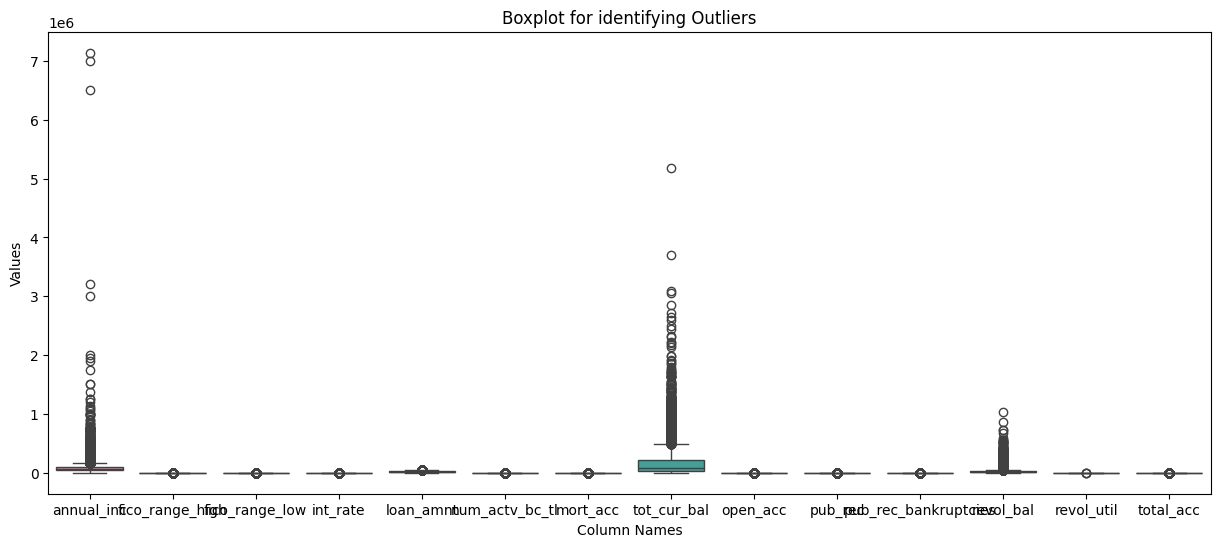

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(data)
plt.title('Boxplot for identifying Outliers')
plt.xlabel('Column Names')
plt.ylabel('Values')

WE CAN EASLIY SAW THAT THIER ARE SOME OUTLIER PRESENT IN ANNUAL_INC,TOT_CUR_BAL AND REVOL_BAL

soo we need to handle to make code more effective

USING Z SCORE FOR OUTLIER TREATMENT

In [17]:
# Calculate Z-scores for outlier numeric column
z_scores = data[['annual_inc', 'tot_cur_bal', 'revol_bal']].apply(zscore)

#Threshold
z_score_threshold = 3

# Identify outliers
outliers = (z_scores.abs() > z_score_threshold)

In [18]:
## Identify outliers and prepare cleaned data by removing outliers
outlier_indices = (z_scores > z_score_threshold).any(axis=1)
data = data[~outlier_indices]

In [19]:
data

addr_state  annual_inc earliest_cr_line emp_length  \
0             CO     85000.0           Jul-97  10+ years   
1             CA     40000.0           Apr-87  10+ years   
2             FL     60000.0           Aug-07  10+ years   
3             IL    100742.0           Sep-80  10+ years   
4             MD     80000.0           Jul-99  10+ years   
...          ...         ...              ...        ...   
79994         TN     60000.0           Aug-08   < 1 year   
79995         SC     81000.0           Feb-00  10+ years   
79996         NH     45000.0           Aug-95  10+ years   
79997         NY     90000.0           Apr-05   < 1 year   
79998         TX     94000.0           Apr-92    3 years   

                            emp_title  fico_range_high  fico_range_low grade  \
0                              Deputy              744             740     E   
1      Department of Veterans Affairs              724             720     B   
2                    Marble polishing              679             675     B   
3                             printer              664             660     B   
4                       Southern Mgmt              669             665     F   
...                               ...              ...             ...   ...   
79994      Physical Therapy Assistant              689             685     D   
79995            Sports Group Manager              664             660     G   
79996                    Web Designer              684             680     C   
79997                 Program Officer              724             720     B   
79998            Sr. Business Analyst              669             665     D   

      home_ownership application_type  ... pub_rec_bankruptcies  \
0           MORTGAGE       Individual  ...                  0.0   
1               RENT       Individual  ...                  0.0   
2           MORTGAGE       Individual  ...                  0.0   
3           MORTGAGE       Individual  ...                  0.0   
4               RENT       Individual  ...                  0.0   
...              ...              ...  ...                  ...   
79994           RENT       Individual  ...                  0.0   
79995       MORTGAGE       Individual  ...                  0.0   
79996       MORTGAGE       Individual  ...                  0.0   
79997            OWN       Individual  ...                  0.0   
79998       MORTGAGE       Individual  ...                  1.0   

                  purpose  revol_bal  revol_util  sub_grade        term  \
0      debt_consolidation       5338        93.6         E1   60 months   
1      debt_consolidation      19944        60.3         B1   36 months   
2      debt_consolidation      23199        88.5         B5   36 months   
3      debt_consolidation      18425        69.0         B2   36 months   
4      debt_consolidation      34370        90.0         F5   60 months   
...                   ...        ...         ...        ...         ...   
79994               other       3095        36.4         D3   36 months   
79995  debt_consolidation      20201        93.5         G3   60 months   
79996  debt_consolidation       6145        56.9         C1   36 months   
79997  debt_consolidation       3910        25.6         B4   36 months   
79998         credit_card      11897        49.4         D5   60 months   

                         title  total_acc  verification_status loan_status  
0           Debt consolidation          8      Source Verified   Defaulted  
1                  Credit Loan         12             Verified        Paid  
2           Debt consolidation         16      Source Verified        Paid  
3           Debt consolidation         19      Source Verified        Paid  
4          Debt Connsolidation         59             Verified        Paid  
...                        ...        ...                  ...         ...  
79994                    Other         10      Source Verified        Paid  
79

# **Exploratoray** data analysis

# VIZUALIZING THE DATA

# loan status with home owership

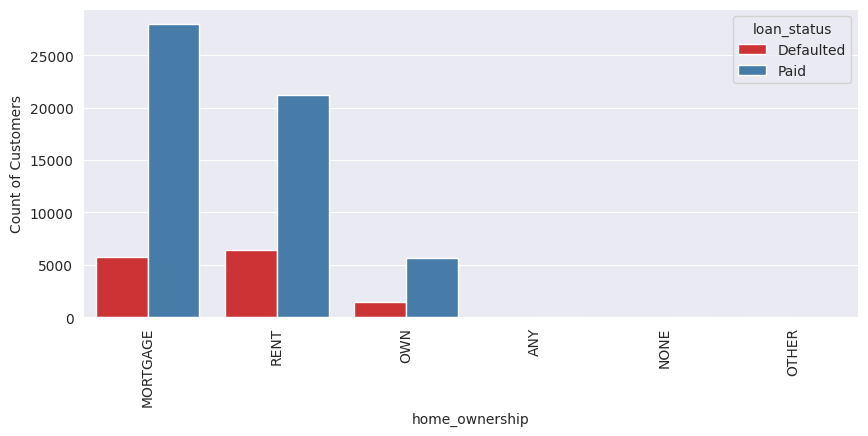

In [20]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize= (10,4))
sns.countplot(x = 'home_ownership', data =data, hue = 'loan_status', palette="Set1")
plt.ylabel('Count of Customers')
plt.xticks(rotation = 90)
plt.show()

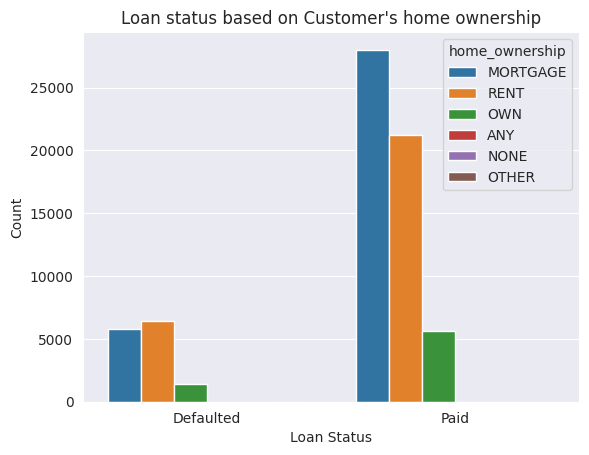

In [21]:
#  Loan status based on Customer's home ownership

sns.countplot(x='loan_status',hue='home_ownership',data=data)
plt.title('Loan status based on Customer\'s home ownership')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


# loan status with grade

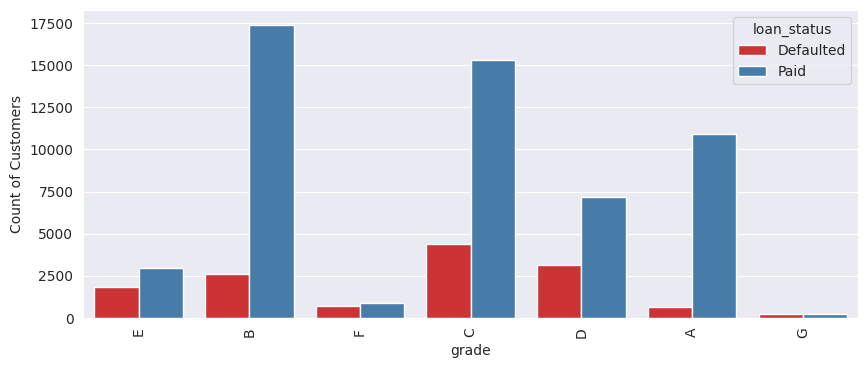

In [22]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize= (10,4))
sns.countplot(x = 'grade', data = data, hue = 'loan_status', palette="Set1")
plt.ylabel('Count of Customers')
plt.xticks(rotation = 90)
plt.show()

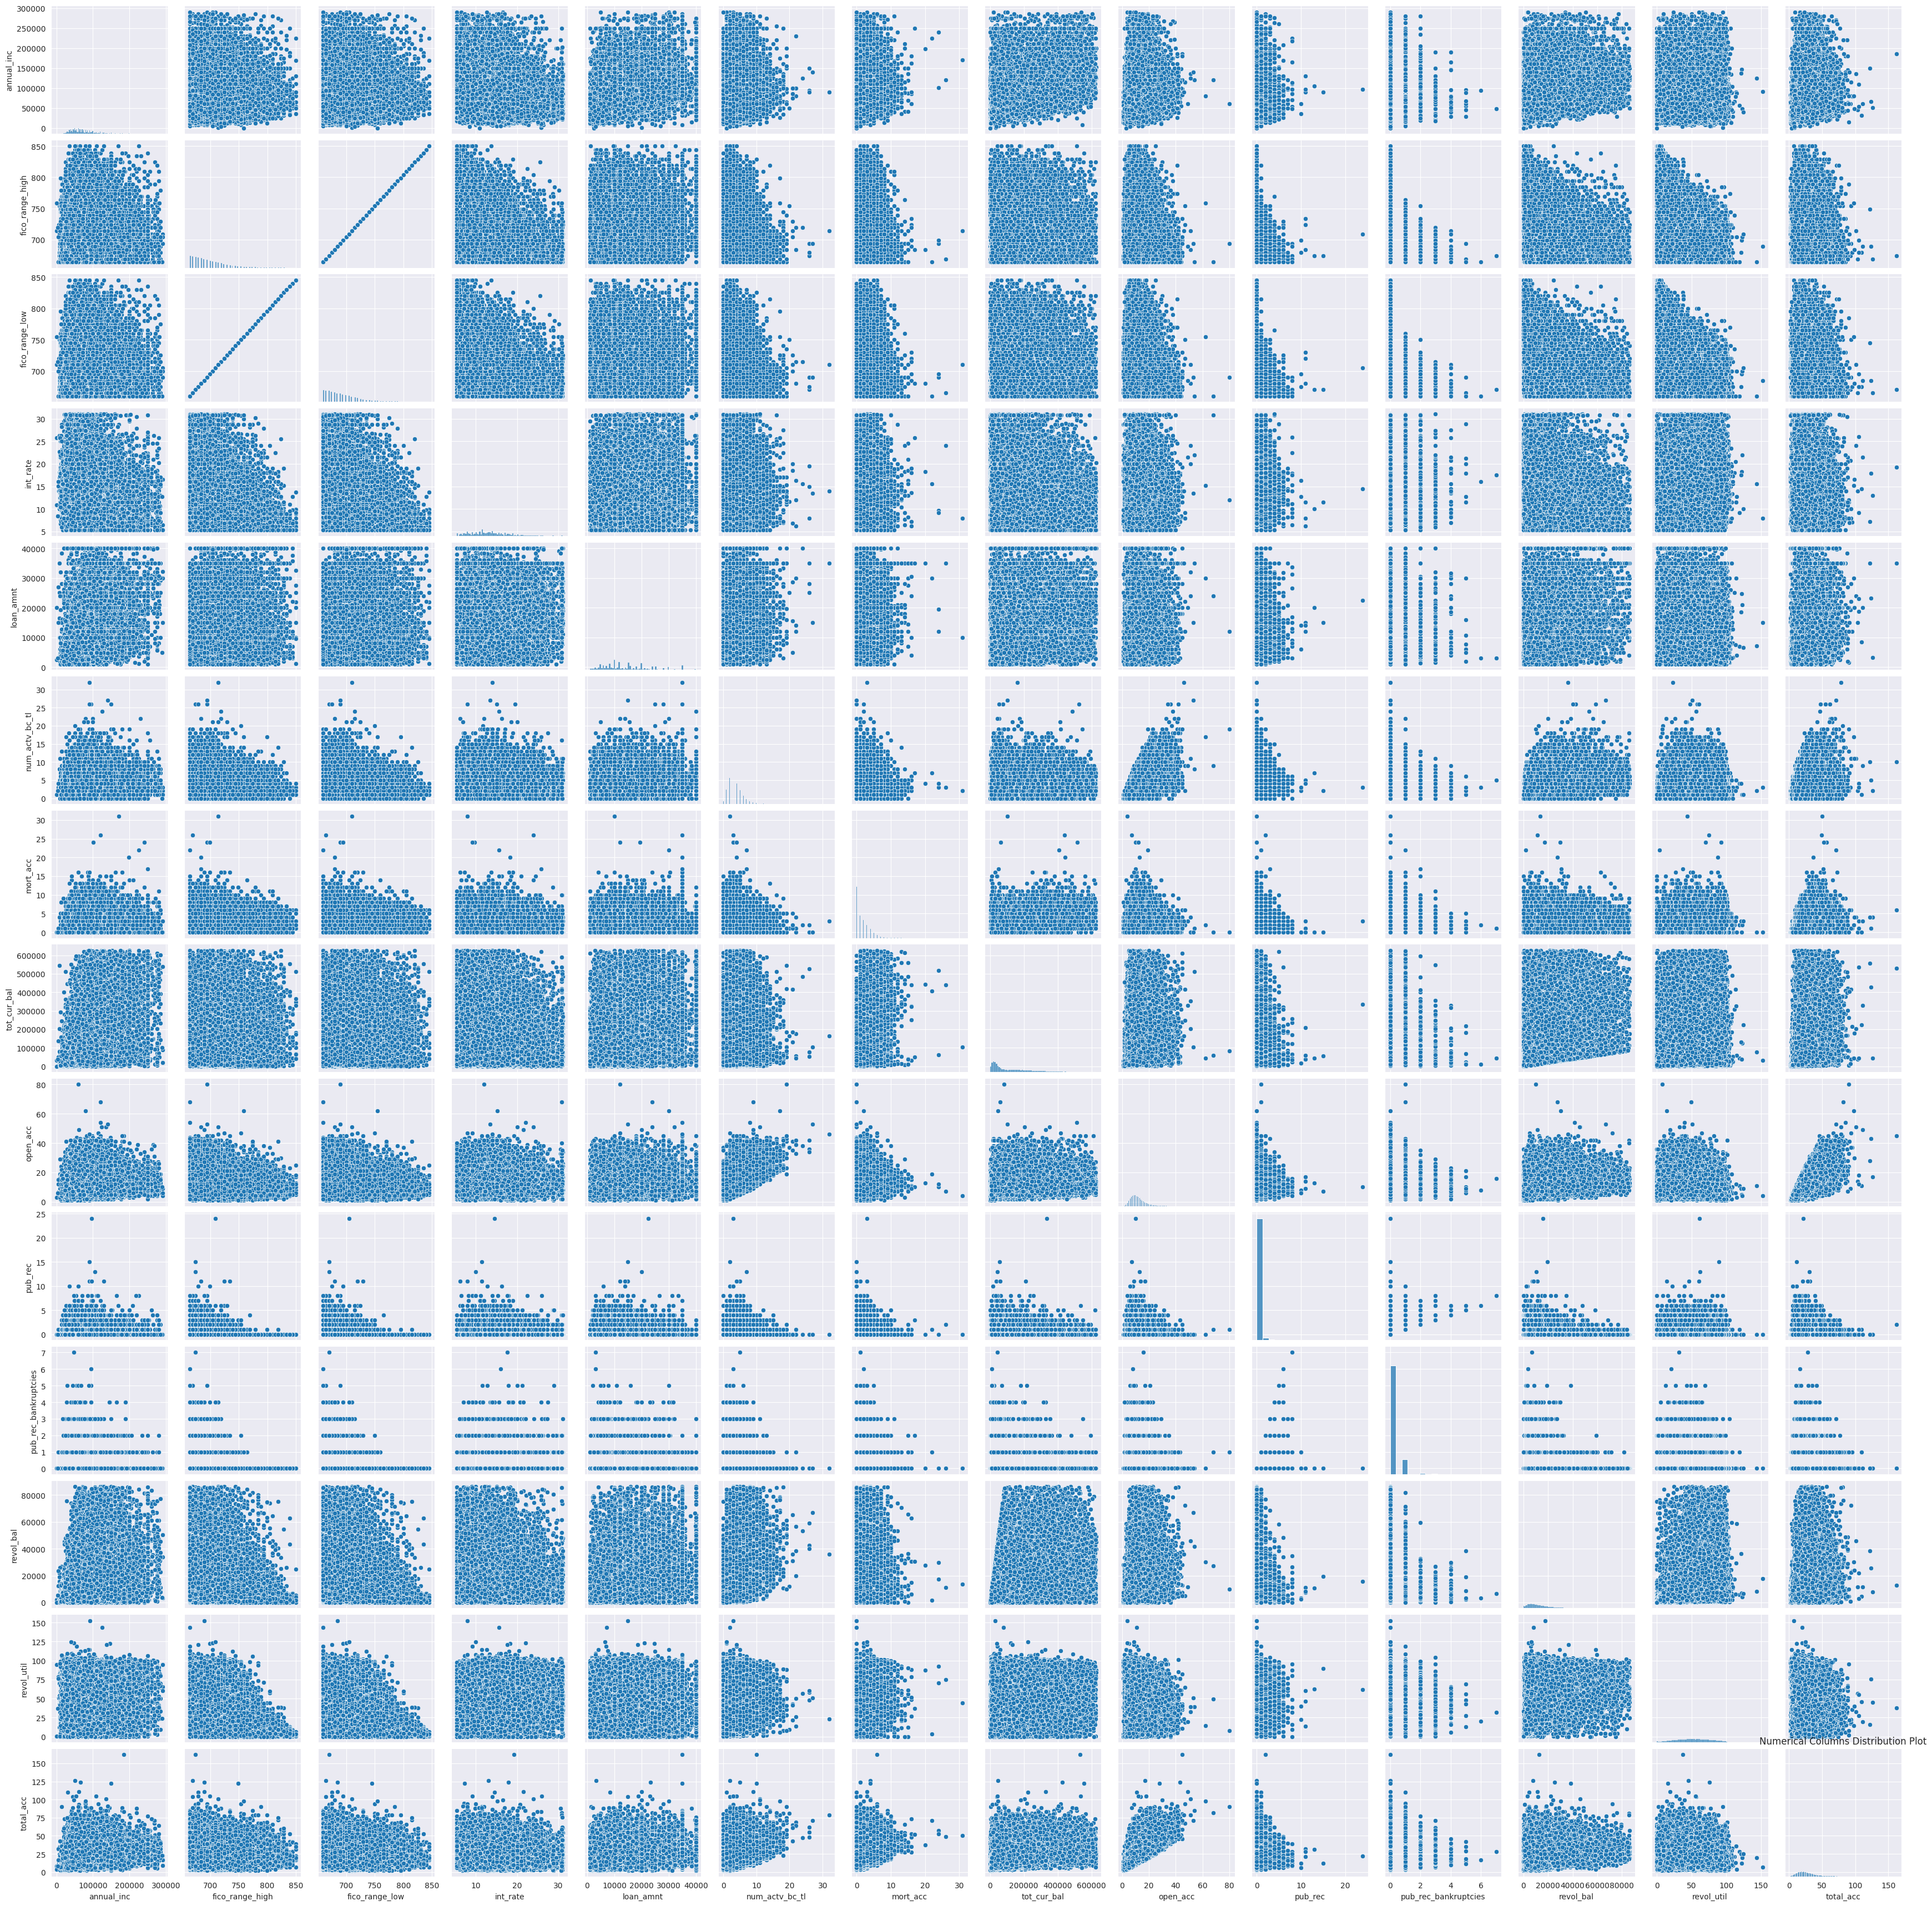

In [23]:
sns.pairplot(data = data)
plt.title('Numerical Columns Distribution Plot')
plt.show()

# **Feature Engineering**

# Encoding the Categorical Columns

ENCODING USE TO TRANSFORM CATEGORICAL INTO NUMERIC FORM SO THAT PROGRAM WILL WORK WITH MORE EFFECTIVNESS

In [24]:
categorical = []
numerical = []
for col in data.columns:
    if data[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)
categorical, numerical

## Define encoder
encoder = LabelEncoder()
for col in categorical:
    data[col] =  encoder.fit_transform(data[col])

In [25]:
data

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0               5     85000.0               303           1       6992   
1               4     40000.0                38           1       6949   
2               9     60000.0                58           1      15121   
3              13    100742.0               589           1      31155   
4              19     80000.0               305           1      23526   
...           ...         ...               ...         ...        ...   
79994          41     60000.0                59          10      18260   
79995          39     81000.0               151           1      23657   
79996          29     45000.0                96           1      27645   
79997          33     90000.0                 5          10      19204   
79998          42     94000.0                43           3      24007   

       fico_range_high  fico_range_low  grade  home_ownership  \
0                  744             740      4               1   
1                  724             720      1               5   
2                  679             675      1               1   
3                  664             660      1               1   
4                  669             665      5               5   
...                ...             ...    ...             ...   
79994              689             685      3               5   
79995              664             660      6               1   
79996              684             680      2               1   
79997              724             720      1               4   
79998              669             665      3               1   

       application_type  ...  pub_rec_bankruptcies  purpose  revol_bal  \
0                     0  ...                   0.0        2       5338   
1                     0  ...                   0.0        2      19944   
2                     0  ...                   0.0        2      23199   
3                     0  ...                   0.0        2      18425   
4                     0  ...                   0.0        2      34370   
...                 ...  ...                   ...      ...        ...   
79994                 0  ...                   0.0        8       3095   
79995                 0  ...                   0.0        2      20201   
79996                 0  ...                   0.0        2       6145   
79997                 0  ...                   0.0        2       3910   
79998                 0  ...                   1.0        1      11897   

       revol_util  sub_grade  term  title  total_acc  verification_status  \
0            93.6         20     1   1011          8                    1   
1            60.3          5     0    707         12                    2   
2            88.5          9     0   1011         16                    1   
3            69.0          6     0   1011         19                    1   
4            90.0         29     1    861         59                    2   
...           ...        ...   ...    ...        ...                  ...   
79994        36.4         17     0   1915         10                    1   
79995        93.5         32     1   1011         42                    2   
79996        56.9         10     0   1011         14                    0   
79997        25.6          8     0   1011         26                    1   
79998        49.4         19     1    758         48                    1   

       loan_status  
0                0  
1                1  
2                1  
3                1  
4                1  
...            ...  
79994            1  
79995            0  
79996            1  
79997            1  
79998            1  

[68509 rows x 28 columns]

# SCALING THE  NUMERICAL DATA

USE STANDARD SCALER TO TRANSFORM THE NUMERCIAL DATA

In [26]:
## Define Scaler
sc_x = StandardScaler()

## Perform Scaling using fit_transform
data[numerical] = sc_x.fit_transform(data[numerical])


In [27]:
data


addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0               5    0.304688               303           1       6992   
1               4   -0.889321                38           1       6949   
2               9   -0.358650                58           1      15121   
3              13    0.722379               589           1      31155   
4              19    0.172020               305           1      23526   
...           ...         ...               ...         ...        ...   
79994          41   -0.358650                59          10      18260   
79995          39    0.198554               151           1      23657   
79996          29   -0.756653                96           1      27645   
79997          33    0.437356                 5          10      19204   
79998          42    0.543490                43           3      24007   

       fico_range_high  fico_range_low  grade  home_ownership  \
0             1.455219        1.455265      4               1   
1             0.810919        0.810947      1               5   
2            -0.638757       -0.638769      1               1   
3            -1.121983       -1.122008      1               1   
4            -0.960908       -0.960928      5               5   
...                ...             ...    ...             ...   
79994        -0.316607       -0.316610      3               5   
79995        -1.121983       -1.122008      6               1   
79996        -0.477682       -0.477690      2               1   
79997         0.810919        0.810947      1               4   
79998        -0.960908       -0.960928      3               1   

       application_type  ...  pub_rec_bankruptcies  purpose  revol_bal  \
0                     0  ...             -0.360282        2  -0.741788   
1                     0  ...             -0.360282        2   0.432159   
2                     0  ...             -0.360282        2   0.693778   
3                     0  ...             -0.360282        2   0.310071   
4                     0  ...             -0.360282        2   1.591639   
...                 ...  ...                   ...      ...        ...   
79994                 0  ...             -0.360282        8  -0.922067   
79995                 0  ...             -0.360282        2   0.452815   
79996                 0  ...             -0.360282        2  -0.676926   
79997                 0  ...             -0.360282        2  -0.856562   
79998                 0  ...              2.219958        1  -0.214613   

       revol_util  sub_grade  term  title  total_acc  verification_status  \
0        1.717438         20     1   1011  -1.423522                    1   
1        0.342760          5     0    707  -1.090379                    2   
2        1.506901          9     0   1011  -0.757236                    1   
3        0.701910          6     0   1011  -0.507379                    1   
4        1.568824         29     1    861   2.824050                    2   
...           ...        ...   ...    ...        ...                  ...   
79994   -0.643871         17     0   1915  -1.256951                    1   
79995    1.713310         32     1   1011   1.408192                    2   
79996    0.202402         10     0   1011  -0.923808                    0   
79997   -1.089713          8     0   1011   0.075621                    1   
79998   -0.107210         19     1    758   1.907907                    1   

       loan_status  
0                0  
1                1  
2                1  
3                1  
4                1  
...            ...  
79994            1  
79995            0  
79996            1  
79997            1  
79998            1  

[68509 rows x 28 columns]

SEPERATING X AND Y

In [28]:
X = data.drop('loan_status', axis = True)
Y = data['loan_status']

# **SPLIT DATA INTO TRAIN AND VALID(TEST) FORM**

In [29]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

FROM ABOVE EDA WE CAN EASILY FIND OUT THAT IN DATA THEIR WERE LOT OF IMBALANCMENT IN LOAN STATUS SOO WE NEED TO HANDLE THAT IMBALANCMENT BY USING SMOTE

# ***USING SMOTE FOR HANDALING UNBALANCE DATASET***

In [30]:
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(X_train, Y_train)

CHECKING DIFFECNCE AFTER USING SMOTE

<ipython-input-31-ed3df3cfb529>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette='viridis')


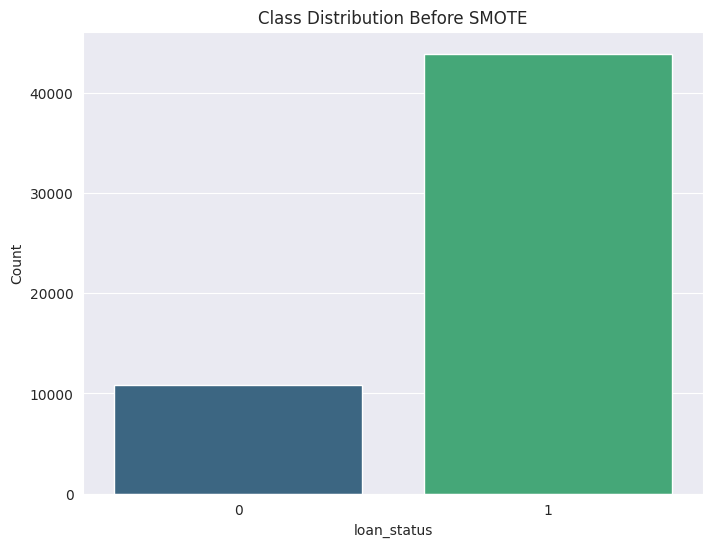

<ipython-input-31-ed3df3cfb529>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette='viridis')


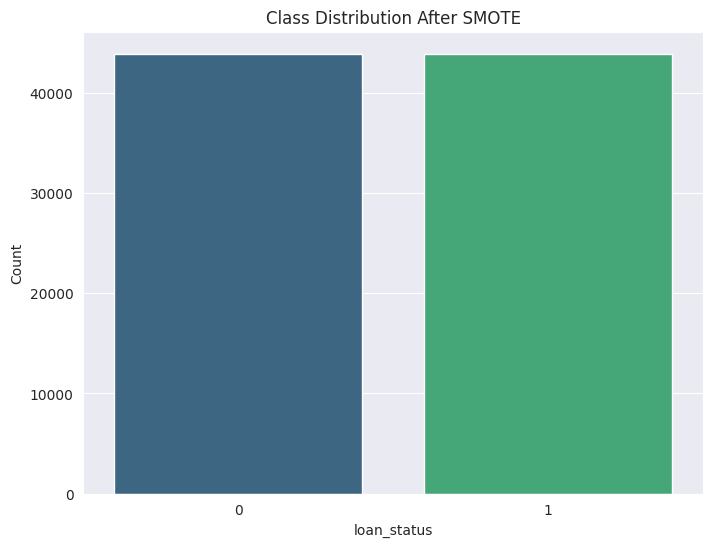

In [31]:
# differennce of class before and after the smote

import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=Y_train, palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.show()

# After SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote, palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.show()


# MODEL TRANING

We will use different model for checking orr selection of model which perform better than other

# LOGISTIC REGRESSION

In [32]:
modellg = LogisticRegression()
# training
modellg.fit(x_smote, y_smote)
# testing
Y_predlg = modellg.predict(X_valid)
print(classification_report(Y_valid, Y_predlg))
print("F1 Score:",f1_score(Y_valid, Y_predlg))
print("acuuracy:",accuracy_score(Y_valid, Y_predlg))
print("precision",precision_score(Y_valid, Y_predlg))
print("recall",recall_score(Y_valid, Y_predlg))
print("roc-auc-score",roc_auc_score(Y_valid, Y_predlg))


              precision    recall  f1-score   support

           0       0.30      0.61      0.40      2720
           1       0.87      0.64      0.74     10982

    accuracy                           0.64     13702
   macro avg       0.58      0.63      0.57     13702
weighted avg       0.76      0.64      0.67     13702

F1 Score: 0.7393330192136537
acuuracy: 0.6366223908918406
precision 0.8696883852691218
recall 0.6429612092515025
roc-auc-score 0.6269953105081042


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RANDOM FOREST

In [35]:
 # RANDOM FOREST MODEL
modelrf = RandomForestClassifier()
# training
modelrf.fit(x_smote, y_smote)
# testing
Y_predrf = modelrf.predict(X_valid)
print(classification_report(Y_valid, Y_predrf))
print("F1 Score:",f1_score(Y_valid, Y_predrf))
print("acuuracy:",accuracy_score(Y_valid, Y_predrf))
print("precision",precision_score(Y_valid, Y_predrf))
print("recall",recall_score(Y_valid, Y_predrf))
print("roc-auc-score",roc_auc_score(Y_valid, Y_predrf))


              precision    recall  f1-score   support

           0       0.40      0.18      0.25      2720
           1       0.82      0.93      0.87     10982

    accuracy                           0.78     13702
   macro avg       0.61      0.56      0.56     13702
weighted avg       0.74      0.78      0.75     13702

F1 Score: 0.87267292912041
acuuracy: 0.782367537585754
precision 0.8215951117543013
recall 0.9305226734656711
roc-auc-score 0.5573569249681297


# XGBOOST

In [75]:
from xgboost import XGBClassifier
modelxc = XGBClassifier(n_jobs=-1)
# training
modelxc.fit(x_smote, y_smote)
# testing
Y_predxc = modelxc.predict(X_valid)
print(classification_report(Y_valid, Y_predxc))
print("F1 Score:",f1_score(Y_valid, Y_predxc))
print("acuuracy:",accuracy_score(Y_valid, Y_predxc))
print("roc-auc-score",roc_auc_score(Y_valid, Y_predxc))

              precision    recall  f1-score   support

           0       0.45      0.12      0.19      2720
           1       0.82      0.96      0.88     10982

    accuracy                           0.80     13702
   macro avg       0.63      0.54      0.54     13702
weighted avg       0.74      0.80      0.75     13702

F1 Score: 0.8833889816360602
acuuracy: 0.7960881623120712
roc-auc-score 0.5415765570934257


# DICISION TREE

In [36]:
# dicision treemodel

modeldt = DecisionTreeClassifier()
# training
modeldt.fit(x_smote, y_smote)
# testing
Y_preddt = modeldt.predict(X_valid)
print(classification_report(Y_valid, Y_preddt))
print("F1 Score:",f1_score(Y_valid, Y_preddt))
print("acuuracy:",accuracy_score(Y_valid, Y_preddt))
print("roc-auc-score",roc_auc_score(Y_valid, Y_preddt))


              precision    recall  f1-score   support

           0       0.25      0.32      0.28      2720
           1       0.82      0.77      0.79     10982

    accuracy                           0.68     13702
   macro avg       0.54      0.54      0.54     13702
weighted avg       0.71      0.68      0.69     13702

F1 Score: 0.7940250833763915
acuuracy: 0.67997372646329
roc-auc-score 0.5438188626843925


# ***MODEL SELECTION***

WE USE F1 CRITERIA TO GET BEST PERFORMING MODEL

In [67]:
# finding best model using f1 score

# Compare F1 scores of different models
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree']
f1_scores = [f1_score(Y_valid, Y_predlg), f1_score(Y_valid, Y_predrf), f1_score(Y_valid, Y_predxc), f1_score(Y_valid, Y_preddt)]

# Find the model with the highest F1 score
best_model_index = f1_scores.index(max(f1_scores))
best_model = models[best_model_index]

# Print the best performing model
print("Best Performing Model:", best_model)


Best Performing Model: XGBoost


ACC. TO MODEL SELECTION WE GET XGBOOST AS BEST MODEL

# HYPERTUNING USING KFOLD

In [38]:
# hypertuning by using k fold validation

from sklearn.model_selection import KFold

# Define the model
model = XGBClassifier()

# Define the hyperparameter grid
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
}

# Create a KFold object with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(model, params, cv=kf, scoring='f1', verbose=3)
grid_search.fit(x_smote, y_smote)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best Parameters:', best_params)
print('Best F1 Score:', best_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.877 total time=   1.3s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.885 total time=   1.3s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.876 total time=   1.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.875 total time=   1.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.878 total time=   2.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.883 total time=   3.3s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.889 total time=   2.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.880 total time=   2.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.881 total time=   2.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.882 total t

after hypertuning we can see the improvment in f1 score which is 88.33 before hypertuning and 88.45 after hypertuning which directly give the indication of best hypertuning

## **USING TEST DATASET**

# LOADING THE DATA

In [42]:
# loading the dataset to a Pandas DataFrame
datatest = pd.read_csv('/content/test_loan_data (1).csv')

In [43]:
datatest

addr_state  annual_inc earliest_cr_line emp_length  \
0             MO     50000.0         May-2012     1 year   
1             HI     92000.0         Dec-2001  10+ years   
2             TX     89000.0         Mar-1989  10+ years   
3             CA     33000.0         Nov-2004    9 years   
4             MI     35580.0         Feb-1997        NaN   
...          ...         ...              ...        ...   
19995         MO     38500.0         Sep-2010    4 years   
19996         VA     80000.0         Dec-1998    3 years   
19997         TX     95000.0         May-1996  10+ years   
19998         FL     35000.0         Mar-2003  10+ years   
19999         FL     30700.0         Apr-1994   < 1 year   

                               emp_title  fico_range_high  fico_range_low  \
0                       Tower technician            719.0           715.0   
1                             Supervisor            684.0           680.0   
2                APPLICATIONS PROGRAMMER            679.0           675.0   
3      San Diego Unified School District            674.0           670.0   
4                                    NaN            704.0           700.0   
...                                  ...              ...             ...   
19995               lighting coordinator            679.0           675.0   
19996      Contract & Compliance Manager            674.0           670.0   
19997                         Pharmacist            729.0           725.0   
19998                Manager In Training            809.0           805.0   
19999                      rv technician            664.0           660.0   

      grade home_ownership application_type  ... pub_rec  \
0         C            OWN       Individual  ...     0.0   
1         B           RENT       Individual  ...     0.0   
2         B       MORTGAGE       Individual  ...     0.0   
3         C           RENT       Individual  ...     1.0   
4         B       MORTGAGE       Individual  ...     0.0   
...     ...            ...              ...  ...     ...   
19995     D           RENT       Individual  ...     0.0   
19996     D       MORTGAGE       Individual  ...     0.0   
19997     B       MORTGAGE       Individual  ...     0.0   
19998     A       MORTGAGE       Individual  ...     0.0   
19999     E       MORTGAGE       Individual  ...     0.0   

       pub_rec_bankruptcies             purpose  revol_bal  revol_util  \
0                       0.0  debt_consolidation     2568.0         9.8   
1                       0.0  debt_consolidation    30394.0        75.4   
2                       0.0         credit_card    38400.0        75.3   
3                       1.0  debt_consolidation    21224.0        69.4   
4                       0.0  debt_consolidation     3471.0        39.4   
...                     ...                 ...        ...         ...   
19995                   0.0  debt_consolidation     5816.0        60.0   
19996                   0.0  debt_consolidation    13886.0        75.1   
19997                   0.0  debt_consolidation    43166.0        60.7   
19998                   0.0                 car     1110.0         4.4   
19999                   0.0  debt_consolidation     8910.0        78.8   

       sub_grade        term                    title  total_acc  \
0             C4   36 months       Debt consolidation       11.0   
1             B2   36 months       Debt consolidation       35.0   
2             B2   60 months  Credit card refinancing       41.0   
3             C1   36 months           Breathing Room       16.0   
4             B5   36 months       debitconsolidation       19.0   
...          ...         ...                      ...        ...   
19995         D4   36 months       Debt consolidation       10.0   
19996         D4   60 months       Debt consolidation       30.0   
19997         B5   36 months       Debt consolidation       29.0   
19998         A5   36 months            Car financing       19.0   
19

In [44]:
# first 5 rows of the dataset
datatest.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         MO     50000.0         May-2012     1 year   
1         HI     92000.0         Dec-2001  10+ years   
2         TX     89000.0         Mar-1989  10+ years   
3         CA     33000.0         Nov-2004    9 years   
4         MI     35580.0         Feb-1997        NaN   

                           emp_title  fico_range_high  fico_range_low grade  \
0                   Tower technician            719.0           715.0     C   
1                         Supervisor            684.0           680.0     B   
2            APPLICATIONS PROGRAMMER            679.0           675.0     B   
3  San Diego Unified School District            674.0           670.0     C   
4                                NaN            704.0           700.0     B   

  home_ownership application_type  ... pub_rec  pub_rec_bankruptcies  \
0            OWN       Individual  ...     0.0                   0.0   
1           RENT       Individual  ...     0.0                   0.0   
2       MORTGAGE       Individual  ...     0.0                   0.0   
3           RENT       Individual  ...     1.0                   1.0   
4       MORTGAGE       Individual  ...     0.0                   0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation     2568.0         9.8         C4   36 months   
1  debt_consolidation    30394.0        75.4         B2   36 months   
2         credit_card    38400.0        75.3         B2   60 months   
3  debt_consolidation    21224.0        69.4         C1   36 months   
4  debt_consolidation     3471.0        39.4         B5   36 months   

                     title  total_acc verification_status  
0       Debt consolidation       11.0     Source Verified  
1       Debt consolidation       35.0     Source Verified  
2  Credit card refinancing       41.0        Not Verified  
3           Breathing Room       16.0        Not Verified  
4       debitconsolidation       19.0            Verified  

[5 rows x 27 columns]

In [45]:
# last 5 rows of the dataset
data.tail()

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
79994          41   -0.358650                59          10      18260   
79995          39    0.198554               151           1      23657   
79996          29   -0.756653                96           1      27645   
79997          33    0.437356                 5          10      19204   
79998          42    0.543490                43           3      24007   

       fico_range_high  fico_range_low  grade  home_ownership  \
79994        -0.316607       -0.316610      3               5   
79995        -1.121983       -1.122008      6               1   
79996        -0.477682       -0.477690      2               1   
79997         0.810919        0.810947      1               4   
79998        -0.960908       -0.960928      3               1   

       application_type  ...  pub_rec_bankruptcies  purpose  revol_bal  \
79994                 0  ...             -0.360282        8  -0.922067   
79995                 0  ...             -0.360282        2   0.452815   
79996                 0  ...             -0.360282        2  -0.676926   
79997                 0  ...             -0.360282        2  -0.856562   
79998                 0  ...              2.219958        1  -0.214613   

       revol_util  sub_grade  term  title  total_acc  verification_status  \
79994   -0.643871         17     0   1915  -1.256951                    1   
79995    1.713310         32     1   1011   1.408192                    2   
79996    0.202402         10     0   1011  -0.923808                    0   
79997   -1.089713          8     0   1011   0.075621                    1   
79998   -0.107210         19     1    758   1.907907                    1   

       loan_status  
79994            1  
79995            0  
79996            1  
79997            1  
79998            1  

[5 rows x 28 columns]

In [47]:
# dataset informations
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            20000 non-null  object 
 1   annual_inc            20000 non-null  float64
 2   earliest_cr_line      20000 non-null  object 
 3   emp_length            18742 non-null  object 
 4   emp_title             18622 non-null  object 
 5   fico_range_high       20000 non-null  float64
 6   fico_range_low        20000 non-null  float64
 7   grade                 20000 non-null  object 
 8   home_ownership        20000 non-null  object 
 9   application_type      20000 non-null  object 
 10  initial_list_status   20000 non-null  object 
 11  int_rate              20000 non-null  float64
 12  loan_amnt             20000 non-null  float64
 13  num_actv_bc_tl        18989 non-null  float64
 14  mort_acc              19296 non-null  float64
 15  tot_cur_bal        

In [49]:
len(datatest)

20000

In [50]:
datatest.shape

(20000, 27)

In [51]:
datatest.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status'],
      dtype='object')

In [52]:
datatest.describe()

annual_inc  fico_range_high  fico_range_low      int_rate  \
count  2.000000e+04     20000.000000    20000.000000  20000.000000   
mean   7.649765e+04       700.204400      696.204250     13.259451   
std    8.568097e+04        31.768558       31.767853      4.772028   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.500000e+04       674.000000      670.000000      9.750000   
50%    6.500000e+04       694.000000      690.000000     12.790000   
75%    9.000000e+04       714.000000      710.000000     16.020000   
max    9.522972e+06       850.000000      845.000000     30.990000   

         loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  20000.00000    18989.000000  19296.000000  1.898900e+04  20000.000000   
mean   14426.67125        3.617410      1.669310  1.412009e+05     11.593450   
std     8811.38736        2.220795      1.981554  1.558483e+05      5.507847   
min     1000.00000        0.000000      0.000000  0.000000e+00      1.000000   
25%     7800.00000        2.000000      0.000000  2.959600e+04      8.000000   
50%    12000.00000        3.000000      1.000000  8.070700e+04     11.000000   
75%    20000.00000        5.000000      3.000000  2.102150e+05     14.000000   
max    40000.00000       20.000000     19.000000  2.210119e+06     56.000000   

            pub_rec  pub_rec_bankruptcies     revol_bal    revol_util  \
count  20000.000000          19989.000000   20000.00000  19987.000000   
mean       0.208000              0.130722   16181.77750     51.709746   
std        0.568816              0.374106   21917.28208     24.509718   
min        0.000000              0.000000       0.00000      0.000000   
25%        0.000000              0.000000    5803.75000     33.200000   
50%        0.000000              0.000000   11051.50000     52.200000   
75%        0.000000              0.000000   19876.25000     70.600000   
max       15.000000              8.000000  921464.00000    127.600000   

          total_acc  
count  20000.000000  
mean      25.022300  
std       12.098794  
min        2.000000  
25%       16.000000  
50%       23.000000  
75%       32.000000  
max      107.000000

# ***preprocessing***

# **checking missing value and trestment**

In [53]:
# checking the number of missing values in each column
datatest.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              1258
emp_title               1378
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      11
purpose                    0
revol_bal                  0
revol_util                13
sub_grade                  0
term                       0
title                    247
total_acc                  0
verification_status        0
dtype: int64

In [54]:
datatest.isnull().values.any()

True

In [55]:
datatest = datatest.dropna()

In [56]:
datatest.isnull().values.any()

False

# **outlier**

Text(0, 0.5, 'Values')

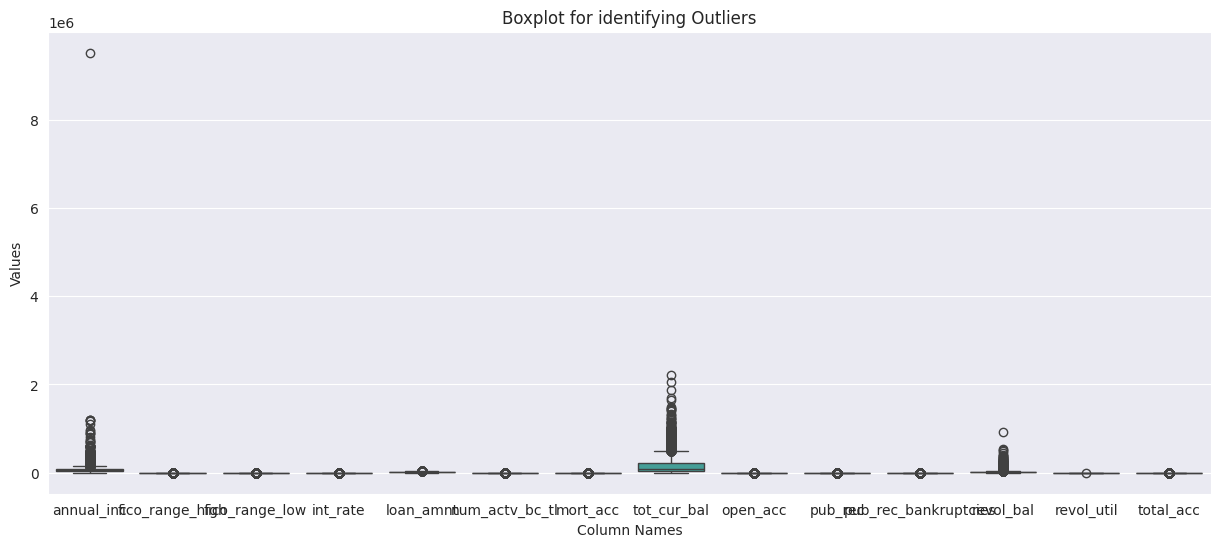

In [48]:
plt.figure(figsize=(15,6))
sns.boxplot(datatest)
plt.title('Boxplot for identifying Outliers')
plt.xlabel('Column Names')
plt.ylabel('Values')

from graph we can easily see that their is not that much difference created by outlier so we not need to remove outliers

# **Feature Engineering**

# Encoding the Categorical Columns

converting categorical datasett into numerical

In [57]:
categorical = []
numerical = []
for col in datatest.columns:
    if datatest[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)
categorical, numerical

## Define encoder
encoder = LabelEncoder()
for col in categorical:
    datatest[col] =  encoder.fit_transform(datatest[col])

<ipython-input-57-470f2984abd2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest[col] =  encoder.fit_transform(datatest[col])
<ipython-input-57-470f2984abd2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest[col] =  encoder.fit_transform(datatest[col])
<ipython-input-57-470f2984abd2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [58]:
datatest

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0              23     50000.0               406           0       8236   
1              11     92000.0               119           1       7814   
2              42     89000.0               340           1         92   
3               4     33000.0               441           9       6819   
5              23     32510.0                74           1       5311   
...           ...         ...               ...         ...        ...   
19995          23     38500.0               538           4       9454   
19996          44     80000.0               116           3       1815   
19997          42     95000.0               390           1       5608   
19998           9     35000.0               354           1       4570   
19999           9     30700.0                24          10       9899   

       fico_range_high  fico_range_low  grade  home_ownership  \
0                719.0           715.0      2               2   
1                684.0           680.0      1               3   
2                679.0           675.0      1               1   
3                674.0           670.0      2               3   
5                724.0           720.0      1               1   
...                ...             ...    ...             ...   
19995            679.0           675.0      3               3   
19996            674.0           670.0      3               1   
19997            729.0           725.0      1               1   
19998            809.0           805.0      0               1   
19999            664.0           660.0      4               1   

       application_type  ...  pub_rec  pub_rec_bankruptcies  purpose  \
0                     0  ...      0.0                   0.0        2   
1                     0  ...      0.0                   0.0        2   
2                     0  ...      0.0                   0.0        1   
3                     0  ...      1.0                   1.0        2   
5                     0  ...      0.0                   0.0        2   
...                 ...  ...      ...                   ...      ...   
19995                 0  ...      0.0                   0.0        2   
19996                 0  ...      0.0                   0.0        2   
19997                 0  ...      0.0                   0.0        2   
19998                 0  ...      0.0                   0.0        0   
19999                 0  ...      0.0                   0.0        2   

       revol_bal  revol_util  sub_grade  term  title  total_acc  \
0         2568.0         9.8         13     0    336       11.0   
1        30394.0        75.4          6     0    336       35.0   
2        38400.0        75.3          6     1    244       41.0   
3        21224.0        69.4         10     0     37       16.0   
5        15111.0        41.4          6     0    336       25.0   
...          ...         ...        ...   ...    ...        ...   
19995     5816.0        60.0         18     0    336       10.0   
19996    13886.0        75.1         18     1    336       30.0   
19997    43166.0        60.7          9     0    336       29.0   
19998     1110.0         4.4          4     0     95       19.0   
19999     8910.0        78.8         20     1    336       19.0   

       verification_status  
0                        1  
1                        1  
2                        0  
3                        0  
5                        0  
...                    ...  
19995                    0  
19996                    1  
19997                    1  
19998                    0  
19999                    2  

[17459 rows x 27 columns]

# SCALING THE NUMERICAL DATA

In [59]:
## Define Scaler
sc_x = StandardScaler()

## Perform Scaling using fit_transform
datatest[numerical] = sc_x.fit_transform(datatest[numerical])

<ipython-input-59-f4861bb20057>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest[numerical] = sc_x.fit_transform(datatest[numerical])


In [60]:
datatest

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0              23   -0.320650               406           0       8236   
1              11    0.149091               119           1       7814   
2              42    0.115538               340           1         92   
3               4   -0.510783               441           9       6819   
5              23   -0.516263                74           1       5311   
...           ...         ...               ...         ...        ...   
19995          23   -0.449269               538           4       9454   
19996          44    0.014880               116           3       1815   
19997          42    0.182644               390           1       5608   
19998           9   -0.488415               354           1       4570   
19999           9   -0.536507                24          10       9899   

       fico_range_high  fico_range_low  grade  home_ownership  \
0             0.639756        0.639772      2               2   
1            -0.487263       -0.487268      1               3   
2            -0.648266       -0.648274      1               1   
3            -0.809269       -0.809280      2               3   
5             0.800759        0.800777      1               1   
...                ...             ...    ...             ...   
19995        -0.648266       -0.648274      3               3   
19996        -0.809269       -0.809280      3               1   
19997         0.961762        0.961783      1               1   
19998         3.537807        3.537874      0               1   
19999        -1.131275       -1.131291      4               1   

       application_type  ...   pub_rec  pub_rec_bankruptcies  purpose  \
0                     0  ... -0.364148             -0.349844        2   
1                     0  ... -0.364148             -0.349844        2   
2                     0  ... -0.364148             -0.349844        1   
3                     0  ...  1.364415              2.296571        2   
5                     0  ... -0.364148             -0.349844        2   
...                 ...  ...       ...                   ...      ...   
19995                 0  ... -0.364148             -0.349844        2   
19996                 0  ... -0.364148             -0.349844        2   
19997                 0  ... -0.364148             -0.349844        2   
19998                 0  ... -0.364148             -0.349844        0   
19999                 0  ... -0.364148             -0.349844        2   

       revol_bal  revol_util  sub_grade  term  title  total_acc  \
0      -0.647509   -1.738507         13     0    336  -1.181799   
1       0.644397    0.965006          6     0    336   0.798932   
2       1.016099    0.960885          6     1    244   1.294115   
3       0.218652    0.717734         10     0     37  -0.769146   
5      -0.065163   -0.436205          6     0    336  -0.026372   
...          ...         ...        ...   ...    ...        ...   
19995  -0.496711    0.330340         18     0    336  -1.264329   
19996  -0.122037    0.952643         18     1    336   0.386280   
19997   1.237375    0.359188          9     0    336   0.303749   
19998  -0.715202   -1.961052          4     0     95  -0.521555   
19999  -0.353063    1.105127         20     1    336  -0.521555   

       verification_status  
0                        1  
1                        1  
2                        0  
3                        0  
5                        0  
...                    ...  
19995                    0  
19996                    1  
19997                    1  
19998                    0  
19999                    2  

[17459 rows x 27 columns]

now after preprocessinng we can easily preditc the test datset

as above from train dataset we get xgboost as best model of we use xgboost to predit the model

In [61]:
# Make predictions on the test dataset
x_test = datatest
y_pred = modelxc.predict(x_test)

In [62]:
# Add the predicted loan_status column to the test dataset
datatest['loan_status'] = y_pred

<ipython-input-62-84933545157c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest['loan_status'] = y_pred


In [63]:
# Save the updated test dataset with predictions
datatest.to_csv('test_loan_data_predictions.csv', index=False)

In [64]:
datatest

addr_state  annual_inc  earliest_cr_line  emp_length  emp_title  \
0              23   -0.320650               406           0       8236   
1              11    0.149091               119           1       7814   
2              42    0.115538               340           1         92   
3               4   -0.510783               441           9       6819   
5              23   -0.516263                74           1       5311   
...           ...         ...               ...         ...        ...   
19995          23   -0.449269               538           4       9454   
19996          44    0.014880               116           3       1815   
19997          42    0.182644               390           1       5608   
19998           9   -0.488415               354           1       4570   
19999           9   -0.536507                24          10       9899   

       fico_range_high  fico_range_low  grade  home_ownership  \
0             0.639756        0.639772      2               2   
1            -0.487263       -0.487268      1               3   
2            -0.648266       -0.648274      1               1   
3            -0.809269       -0.809280      2               3   
5             0.800759        0.800777      1               1   
...                ...             ...    ...             ...   
19995        -0.648266       -0.648274      3               3   
19996        -0.809269       -0.809280      3               1   
19997         0.961762        0.961783      1               1   
19998         3.537807        3.537874      0               1   
19999        -1.131275       -1.131291      4               1   

       application_type  ...  pub_rec_bankruptcies  purpose  revol_bal  \
0                     0  ...             -0.349844        2  -0.647509   
1                     0  ...             -0.349844        2   0.644397   
2                     0  ...             -0.349844        1   1.016099   
3                     0  ...              2.296571        2   0.218652   
5                     0  ...             -0.349844        2  -0.065163   
...                 ...  ...                   ...      ...        ...   
19995                 0  ...             -0.349844        2  -0.496711   
19996                 0  ...             -0.349844        2  -0.122037   
19997                 0  ...             -0.349844        2   1.237375   
19998                 0  ...             -0.349844        0  -0.715202   
19999                 0  ...             -0.349844        2  -0.353063   

       revol_util  sub_grade  term  title  total_acc  verification_status  \
0       -1.738507         13     0    336  -1.181799                    1   
1        0.965006          6     0    336   0.798932                    1   
2        0.960885          6     1    244   1.294115                    0   
3        0.717734         10     0     37  -0.769146                    0   
5       -0.436205          6     0    336  -0.026372                    0   
...           ...        ...   ...    ...        ...                  ...   
19995    0.330340         18     0    336  -1.264329                    0   
19996    0.952643         18     1    336   0.386280                    1   
19997    0.359188          9     0    336   0.303749                    1   
19998   -1.961052          4     0     95  -0.521555                    0   
19999    1.105127         20     1    336  -0.521555                    2   

       loan_status  
0                0  
1                0  
2                0  
3                0  
5                0  
...            ...  
19995            0  
19996            0  
19997            0  
19998            1  
19999            0  

[17459 rows x 28 columns]

In [65]:
test_loan_data_result=datatest['loan_status']

In [66]:
test_loan_data_result

0        0
1        0
2        0
3        0
5        0
        ..
19995    0
19996    0
19997    0
19998    1
19999    0
Name: loan_status, Length: 17459, dtype: int64

test result is a final result acc to project as it show the result of loan status